<a href="https://colab.research.google.com/github/pallavmarch/WebScraping_PsychologyToday/blob/main/psychologytoday_webscraping_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pgeocode
import pgeocode

pd.set_option("display.max_columns", None)
df=pd.read_csv("/content/therapists_profiles_data_Texas.csv",encoding='latin-1')

In [2]:
df[df['Name'] == 'Kathy Lee Siepker']

,Profile URL,Name,Title,Location,State,ZIP Code,Phone,Individual Sessions ($),Couple Sessions ($),Pay By,Insurance,Top Specialties,Expertise,Types of Therapy,Personal Statement,Verified by Psychology Today,In Practice (years),Membership,Certificate,Attended University,Major/Degree,Graduation Year,Qualifications,Endorsement Count,Endorsed By,Age,Participants,Communities,Religion,I also speak
5743,https://www.psychologytoday.com/us/therapists/...,Kathy Lee Siepker,"Clinical Social Work/Therapist,PhD,LCSW,CDP","Flower Mound, TX 75028(214) 692-2076",TX,75028,(214) 692-2076,$150,$150,"ACH Bank transfer, American Express, Discover,...",Aetna | BlueCross and BlueShield | Carelon Beh...,Anxiety | Depression | Dementia,Career Counseling | Coping Skills | Emotional ...,Coaching | Cognitive Behavioral (CBT) | Cultur...,"I am a licensed clinical social worker, therap...",Yes,4,Not Found,National Council of Certified Dementia Practit...,The Ohio State University (PhD); Wash U (MSW),Social Work,2014,Verified byPsychology TodayLicensed by State o...,1,Jamie English - Clinical Social Work/Therapist...,Adults | Elders (65+),Individuals | Couples | Family,Bisexual Allied | Gay Allied | HIV / AIDS Alli...,Not Found,Korean


In [4]:
print(len(df[df['Location'].isnull()]))
df.dropna(subset=['Location'], inplace=True)
print(len(df[df['Location'].isnull()]))

0
0


## Adding columns

In [5]:
df['Age'] = df['Age'].replace({'Elders (65+)': 'Elders'})
df['Dementia'] = df['Expertise'].str.lower().str.contains('dementia') | df['Top Specialties'].str.lower().str.contains('dementia')
df['Autism'] = df['Expertise'].str.lower().str.contains('autism') | df['Top Specialties'].str.lower().str.contains('autism')
df['Depression'] = df['Expertise'].str.lower().str.contains('depression') | df['Top Specialties'].str.lower().str.contains('depression')
df['Elders (65+)']=df['Age'].str.lower().str.contains('elders')
df['ZIP Code']=df['ZIP Code'].astype(int)

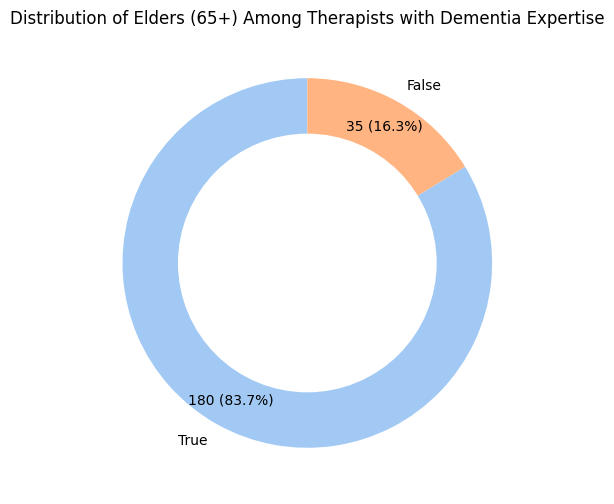

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant data
data = df[df['Dementia'] == True]['Elders (65+)'].value_counts()

# Labels and sizes
labels = data.index
sizes = data.values

# Define color palette
colors = sns.color_palette("pastel", len(labels))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Create the donut chart
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, startangle=90, pctdistance=0.85, colors=colors,
    autopct=lambda p: f'{int(round(p * sum(sizes) / 100))} ({p:.1f}%)',  # Show value + percentage
    textprops={'fontsize': 10}
)

# Draw a circle in the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Set title
plt.title('Distribution of Elders (65+) Among Therapists with Dementia Expertise')

# Show plot
plt.show()


## Adding county, city

In [ ]:
# Initialize the geocoder for US ZIP codes
nomi = pgeocode.Nominatim('us')

# Function to fetch city and county from ZIP Code
def get_location_info(zip_code):
    location = nomi.query_postal_code(zip_code)
    return pd.Series([location['place_name'], location['county_name']])

df[['City', 'County']] = df['ZIP Code'].astype(str).apply(get_location_info)

In [ ]:
df

,Profile URL,Name,Title,Location,State,ZIP Code,Phone,Individual Sessions ($),Couple Sessions ($),Pay By,Insurance,Top Specialties,Expertise,Types of Therapy,Personal Statement,Verified by Psychology Today,In Practice (years),Membership,Certificate,Attended University,Major/Degree,Graduation Year,Qualifications,Endorsement Count,Endorsed By,Age,Participants,Communities,Religion,I also speak,Dementia,Autism,Depression,Elders (65+),City,County
0,https://www.psychologytoday.com/us/therapists/...,Mario Christian Salgado,"Licensed Professional Counselor,MA,LPC","San Antonio, TX 78232(830) 988-4854",TX,78232,(830) 988-4854,$140,Not Found,"ACH Bank transfer, American Express, Discover,...",Aetna | BlueCross and BlueShield | Cigna and E...,Not Found,Anger Management | Anxiety | Body Positivity |...,Art Therapy | Cognitive Behavioral (CBT) | Exp...,"Hello, my name is Mario! I want you all to get...",Yes,4,Not Found,Not Found,Texas A&M University,MA - Clinical Mental Health Counseling,2020,Verified byPsychology TodayLicensed by State o...,2,"Kayla Davis - Licensed Professional Counselor,...",Children (6 to 10) | Preteen | Teen | Adults,Individuals,Not Found,Not Found,Not Found,False,False,True,False,San Antonio,Bexar
1,https://www.psychologytoday.com/us/therapists/...,Denis 'Woodja' Flanigan,"Psychologist,PhD","2211 Norfolk StSuite 206Houston, TX 77098(713)...",TX,77098,(713) 999-3640,$215,$215,"American Express, Cash, Check, Discover, Healt...",Out of Network,Grief | Anxiety | Relationship Issues,Bisexual | Career Counseling | Codependency | ...,Cognitive Behavioral (CBT) | Culturally Sensit...,We can feel the most alone when we are hurting...,Yes,Not Found,Not Found,Not Found,University of Florida,Not Found,2011,Verified byPsychology TodayExpiredLicensed by ...,0,Not Found,Teen | Adults,Individuals | Couples,Bisexual Allied | Gay Allied | HIV / AIDS Alli...,Other Spiritual or Religious Affiliations,Not Found,False,False,True,False,Houston,Harris
2,https://www.psychologytoday.com/us/therapists/...,Carol Burnett-Williams,"Licensed Professional Counselor,LPC(she, her)","Houston, TX 77082(346) 512-4081",TX,77082,(346) 512-4081,Not Found,Not Found,Not Found,Aetna | BlueCross and BlueShield | Cigna and E...,Anxiety | Coping Skills | Depression,ADHD | Alcohol Use | Anger Management | Behavi...,Acceptance and Commitment (ACT) | Child/Parent...,"My name is Carol B. Williams, and I am a licen...",Yes,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Verified byPsychology TodayLicensed by State o...,0,Not Found,Preteen | Teen | Adults,Individuals | Couples | Family,Bisexual Allied | Gay Allied | Intersex Allied...,Not Found,Not Found,False,False,True,False,Houston,Harris
3,https://www.psychologytoday.com/us/therapists/...,"Wenona Andress, LCSW-S","Clinical Social Work/Therapist,LCSW","Wenona Andress, LCSWLaguna Vista, TX 78578(806...",TX,78578,(806) 474-5787,$60,$80,"Cash, Discover, Health Savings Account, Master...",Aetna | BlueCross and BlueShield | Cigna and E...,Chronic Pain | Mood Disorders | Stress,Addiction | Addictive Family Systems | ADHD | ...,Christian Counseling | Clinical Supervision an...,Do you have chronic pain and wonder if you can...,Yes,14,Not Found,University of Massachusetts Center-Tobacco Res...,University of Houston Graduate School of Socia...,Not Found,2005,Verified byPsychology TodayExpiredLicensed by ...,1,Robert Brown Fortney - Licensed Professional C...,Adults | Elders (65+),Individuals | Family,Single Mother,Christian,Not Found,False,False,True,True,Port Isabel,Cameron
4,https://www.psychologytoday.com/us/therapists/...,Clarissa Anahi Cantu,"Licensed Professional Counselor,MS,LPC,LPCC","Austin, TX 78701(512) 640-0239",TX,78701,(512) 640-0239,$150,$170,"Mastercard, Paypal, Venmo, Visa, Zelle",Aetna | BlueCross and BlueShield | Cigna and E...,Depression | Anxiety | Grief,Anger Management | Behavioral Issues | Bisexua...,Adlerian | Cognitive Behavioral (CBT) | Compas...,"Hi there, I am Clarissa! I know it take

### DEMENTIA

In [ ]:
Dementia=df[df['Dementia']==True]

Dementia=Dementia[['Name','Title', 'Location', 'City', 'County','ZIP Code',
       'Individual Sessions ($)', 'Couple Sessions ($)',
       'Insurance', 'Top Specialties', 'Expertise', 'Types of Therapy',
       'In Practice (years)', 'Membership', 'Certificate',
       'Major/Degree', 'Graduation Year', 'I also speak', 'Dementia','Elders (65+)']]

Dementia['Individual Sessions ($)'] = Dementia['Individual Sessions ($)'].replace({'Not Found': '0'}).str.replace('$', '').str.replace(' ', '').astype(float)
Dementia['Couple Sessions ($)'] = Dementia['Couple Sessions ($)'].replace({'Not Found': '0'}).str.replace('$', '').str.replace(' ', '').astype(float)
Dementia['In Practice (years)'] = Dementia['In Practice (years)'].replace({'Not Found': '0'}).astype(float)

In [ ]:
pivot_table1 = pd.pivot_table(Dementia,    #[Dementia['In Practice (years)'] != 0],  # Filter out zeros
                             values=['Individual Sessions ($)', 'Couple Sessions ($)','In Practice (years)'],
                             #columns=['Top Specialties'],
                             columns=['Dementia'],
                             aggfunc=['mean', 'median','min','max',  'std'],
                            )


pivot_table1.style.background_gradient(cmap='Blues').format('{:.2f}')

,mean,median,min,max,std
Dementia,True,True,True,True,True
Couple Sessions ($),70.36,0.00,0.00,350.00,86.91
In Practice (years),8.96,6.00,0.00,41.00,10.35
Individual Sessions ($),109.66,125.00,0.00,250.00,69.08


However There are rows with blank Individual Sessions ($), couple Sessions ($) and In Practice (years) which are not considered 0 instead of blank

In [ ]:
def transform_insurance(row):
  insurance = str(row).lower()
  if "not found" in insurance:
    return "No"
  elif insurance == "out of network":
    return "Out of Network"
  elif "medicare" in insurance and "medicaid" in insurance:
    return "Medicare|Medicaid"
  elif "medicare" in insurance:
    return "Medicare"
  elif "medicaid" in insurance:
    return "Medicaid"
  else:
    return "Yes"

Dementia['Insurance_Category'] = Dementia['Insurance'].apply(transform_insurance)


Dementia.insert(8, 'Insurance_Category', Dementia.pop('Insurance_Category'))
Dementia.head()

In [ ]:
Dementia[Dementia['Top Specialties'].str.contains("Dementia", na=False)]

,Name,Title,Location,City,County,ZIP Code,Individual Sessions ($),Couple Sessions ($),Insurance_Category,Insurance,Top Specialties,Expertise,Types of Therapy,In Practice (years),Membership,Certificate,Major/Degree,Graduation Year,I also speak,Dementia,Elders (65+)
771,Jeremy Berry,"Licensed Professional Counselor,PhD,LPC-S,NCC","Belton, TX 76513(254) 615-4381",Belton,Bell,76513,125.0,150.0,No,Not Found,Dementia,Anxiety | Bisexual | Body Positivity | Coping ...,Acceptance and Commitment (ACT) | Adlerian | C...,15.0,Not Found,Not Found,PhD,2013,Not Found,True,True
904,Jesus Aranda Bilingual,"Psychologist,PsyD",Centric Physicians Behavioral Services17 Old S...,Boerne,Kendall,78006,0.0,0.0,Medicare,Aetna | BlueCross and BlueShield | Carelon Beh...,Testing and Evaluation | Depression | Dementia,ADHD | Anxiety | Asperger's Syndrome | Autism ...,Cognitive Behavioral (CBT) | Emotionally Focus...,0.0,Not Found,Universidad Europea Miguel de CervantesNeurops...,Not Found,2009,Spanish | SPANISH,True,True
2196,Charles Plafcan,"Licensed Professional Counselor,LPC(he, him)","Kerrville, TX 78028(512) 877-1285",Kerrville,Kerr,78028,0.0,0.0,Yes,Aetna | BlueCross and BlueShield | Cigna and E...,Aging | Dementia | Depression,Anger Management | Anxiety | Behavioral Issues...,Christian Counseling | Coaching | Cognitive Be...,14.0,Not Found,Not Found,Garland,2010,Not Found,True,True
2370,Ursula Alford,"Psychologist,PhD","5055 West Park BoulevardSuite 400Plano, TX 750...",Plano,Collin,75093,120.0,0.0,Medicare,Blue Cross | Blue Shield | BlueCross and BlueS...,Testing and Evaluation | Coping Skills | Dementia,ADHD | Anxiety | Cancer | Chronic Illness | De...,Cognitive Behavioral (CBT) | Cognitive Process...,0.0,Not Found,Not Found,Not Found,Not Found,Not Found,True,True
4119,Crystal Walter,"Clinical Social Work/Therapist,MSW,MPA,LCSW(sh...","P.O. Box 31478Houston, TX 77231(281) 767-2824",Houston,Harris,77231,180.0,200.0,Medicare,Aetna | BlueCross and BlueShield | Government ...,Dementia | Geriatric and Seniors | Women's Issues,Addiction | Body Positivity | Cancer | Child |...,Acceptance and Commitment (ACT) | Art Therapy ...,17.0,Not Found,University of Houston Graduate College Social ...,Not Found,2006,Not Found,True,True
4650,Tina E Wilson,"Clinical Social Work/Therapist,LCSW","Addison, TX 75001(469) 382-4067",Addison,Dallas,75001,120.0,150.0,Yes,Aetna | BlueCross and BlueShield | Cigna and E...,Bipolar Disorder | Dementia | Family Conflict,Addiction | Anxiety | Behavioral Issues | Bord...,Coaching | Cognitive Behavioral (CBT) | Cognit...,4.0,Not Found,Not Found,MSW,2006,Not Found,True,True
5743,Kathy Lee Siepker,"Clinical Social Work/Therapist,PhD,LCSW,CDP","Flower Mound, TX 75028(214) 692-2076",Flower Mound,Denton,75028,150.0,150.0,Medicare,Aetna | BlueCross and BlueShield | Carelon Beh...,Anxiety | Depression | Dementia,Career Counseling | Coping Skills | Emotional ...,Coaching | Cognitive Behavioral (CBT) | Cultur...,4.0,Not Found,National Council of Certified Dementia Practit...,Social Work,2014,Korean,True,True
6807,Sally R Good,"Psychologist,PhD","Cuero, TX 77954(361) 273-5876",Cuero,DeWitt,77954,150.0,0.0,Yes,Aetna | BlueCross and BlueShield | Cigna and E...,Dementia | Depression | Stress,Anxiety | Bipolar Disorder | Caregivers | Life...,Acceptance and Commitment (ACT) | Breathing fo...,19.0,Not Found,Not Found,Not Found,Not Found,Not Found,True,True
7037,"Wendy K. Ringe, PhD","Psychologist,PhD(she, her)","Wendy K. Ringe, PhDDallas, TX 75252(469) 444-2137",Dallas,Dallas,75252,225.0,0.0,Out of Network,Out of Network,Mood Disorders | Dementia | Relationship Issues,Anxiety | Asperger's Syndrome | Behavioral Iss...,Cognitive Behavioral (CBT) | Cognitive Rehabil...,0.0,Not Found,Not Found,Not Found,2001,Not Found,True,True
7375,CHS Health Group,"Psychologist,PhD","2646 South Loop WestSuite 360Houston, TX 77054...",Houston,Harris,77054,250.0,300.0,No,Not Found,Dementia | Depression | Stress,Addiction | ADHD | Alcohol Use | Anxiety | Beh...,Acceptan

In [ ]:
#Dementia.to_csv('Dementia.csv', index=False)
Dementia.to_excel('Dementia.xlsx', index=False)